# Logistic Regression Project 

In this notebook I dig into this [dataset](https://www.kaggle.com/fayomi/advertising) containing data on webpage adverts. It allows me to look at the profile of the users that do/do not click on the adverts they see in order to try and predict the behavior of others.

* 'Daily Time Spent on Site': Daily time on site in minutes
* 'Age': Age in years
* 'Area Income': Average income of geographical area
* 'Daily Internet Usage': Average minutes a day spent online
* 'Ad Topic Line': Ad Headline
* 'City': City
* 'Male': Gender
* 'Country': Country
* 'Timestamp': Time that consumer clicked/closed ad
* 'Clicked on Ad': Did customer click on advert?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## Get the Data

In [2]:
ad = pd.read_csv('advertising.csv', parse_dates=['Timestamp'])

In [3]:
ad.sample(7)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
480,57.11,22,59677.64,207.17,Self-enabling tertiary challenge,Lake Jonathanview,1,Dominican Republic,2016-06-07 23:46:51,0
298,80.39,31,66269.49,214.74,Fully-configurable incremental Graphical User ...,Paulport,0,Gabon,2016-05-03 08:21:23,0
314,84.29,41,60638.38,232.54,Re-contextualized systemic time-frame,Jacksonmouth,0,Niue,2016-01-27 20:47:57,0
108,47.53,30,33258.09,135.18,Customer-focused upward-trending contingency,Hughesport,0,Guinea,2016-04-03 05:10:31,1
670,77.89,26,64188.50,201.54,Switchable multi-state success,West Sharon,0,Singapore,2016-05-15 03:10:50,0
208,59.51,58,39132.64,140.83,Assimilated fault-tolerant hub,Penatown,0,Australia,2016-06-16 02:01:24,1
89,56.89,37,37334.78,109.29,Open-source coherent policy,Nelsonfurt,1,Wallis and Futuna,2016-05-25 00:19:57,1


** Use info and describe() on ad_data**

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null datetime64[ns]
Clicked on Ad               1000 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [5]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

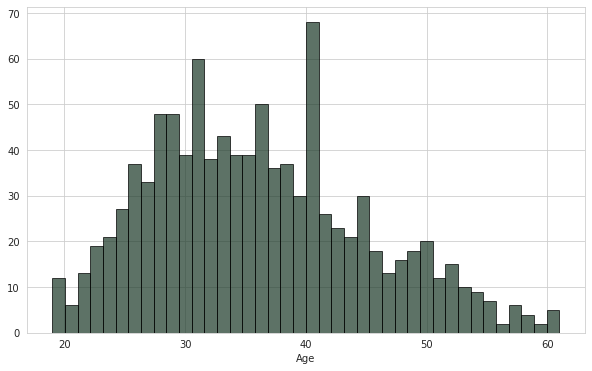

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(
    ad['Age'],
    bins=40,
    kde=False,
    color= '#193725',
    hist_kws={'edgecolor': 'black', 'alpha': 0.7}
)

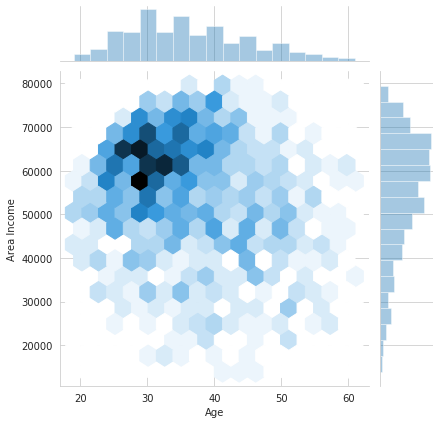

In [7]:
sns.jointplot(
    x='Age',
    y='Area Income',
    data=ad,
    kind='hex'
)

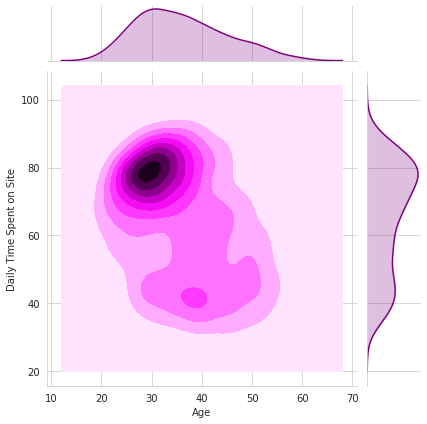

In [8]:
sns.jointplot(
    x='Age',
    y='Daily Time Spent on Site',
    data=ad,
    kind='kde',
    color='#800080'
)

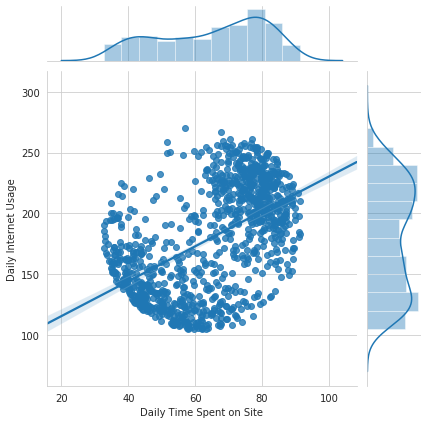

In [9]:
sns.jointplot(
    x='Daily Time Spent on Site',
    y='Daily Internet Usage',
    data=ad,
    kind='reg'
)

/home/rhys/anaconda3/envs/data-science/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/rhys/anaconda3/envs/data-science/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


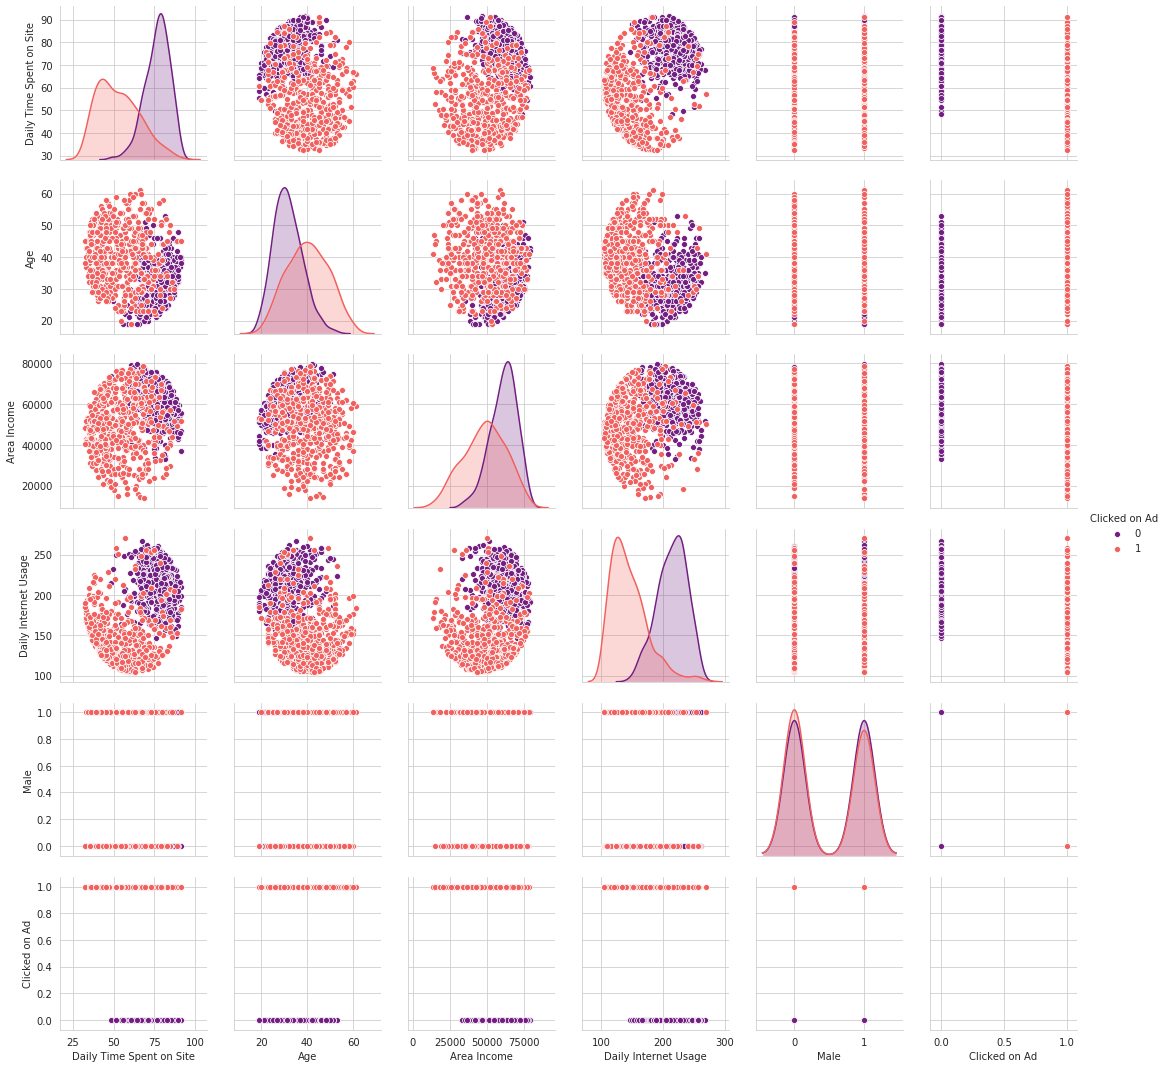

In [10]:
sns.pairplot(
    data=ad,
    hue='Clicked on Ad',
    palette='magma'
)

Is any of the textual information useful?

In [11]:
ad['City'].nunique()

969

In [12]:
ad['Ad Topic Line'].nunique()

1000

In [13]:
ad['Country'].nunique()

237

In [14]:
ad['Country'].value_counts().head(10)

France            9
Czech Republic    9
Peru              8
Cyprus            8
Turkey            8
Micronesia        8
Liberia           8
Senegal           8
Greece            8
Afghanistan       8
Name: Country, dtype: int64

*Not a great deal to work with here...*

Is there anything interesting data correlations that can be drawn from the Timestamp field?
- Is the add seasonally effective?
- Are people more likely to click at a certain time of day?

In [15]:
ad['Hour'] = ad['Timestamp'].apply(lambda x: x.hour)
ad['Month'] = ad['Timestamp'].apply(lambda x: x.month)
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,6


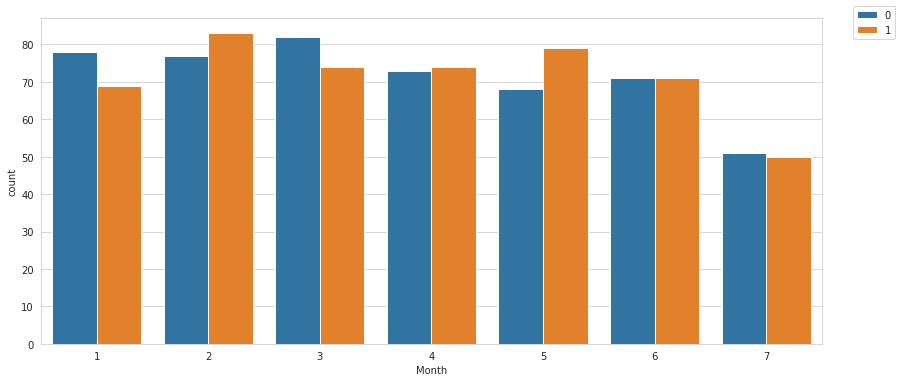

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(
    'Month', 
    hue='Clicked on Ad',
    data=ad,
)
ax.legend(bbox_to_anchor=(1.1, 1.05))

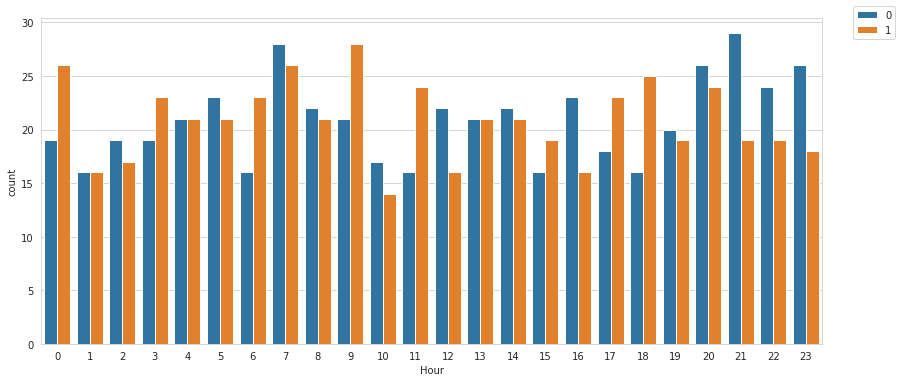

In [17]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(
    'Hour', 
    hue='Clicked on Ad',
    data=ad
)
ax.legend(bbox_to_anchor=(1.1, 1.05))

There is nothing stand-out here either. It looks as though people are slightly less inclined to click on ads late at night, but there's not much in it.

In [40]:
ad.corr()['Clicked on Ad'].abs().sort_values(ascending=False)

Clicked on Ad               1.000000
Daily Internet Usage        0.786539
Daily Time Spent on Site    0.748117
Age                         0.492531
Area Income                 0.476255
Hour                        0.047431
Male                        0.038027
Month                       0.016095
Name: Clicked on Ad, dtype: float64

`.corr()` suggests that the original numeric fields will be the best predictors for our model. 

Looks like people who spend more time on the internet are less likely to click on ads. 

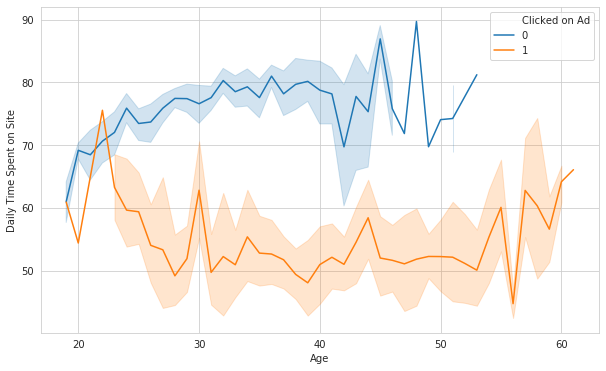

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(
    y='Daily Time Spent on Site',
    x='Age',
    hue='Clicked on Ad',
    data=ad,
)

# Training & Testing the Model

In [20]:
y = ad['Clicked on Ad']
X = ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=50
)
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
316,75.84,21,48537.18,186.98,0
459,79.82,26,51512.66,223.28,1
854,75.03,34,35764.49,255.57,0
11,83.07,37,62491.01,230.87,1
978,71.40,30,72188.90,166.31,0
...,...,...,...,...,...
399,77.29,27,66265.34,201.24,1
108,47.53,30,33258.09,135.18,0
770,71.14,30,69758.31,224.82,0
855,50.87,24,62939.50,190.41,0


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression(solver='liblinear')

In [25]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = log_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
cr1 = classification_report(y_test, predictions)

0.91 across the board suggests the model is already a great fit. But further investigation can yield interesting results...

In [29]:
y = ad['Clicked on Ad']
X = ad[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Hour']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=50
)
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour
316,75.84,21,48537.18,186.98,0,7
459,79.82,26,51512.66,223.28,1,22
854,75.03,34,35764.49,255.57,0,18
11,83.07,37,62491.01,230.87,1,8
978,71.40,30,72188.90,166.31,0,17
...,...,...,...,...,...,...
399,77.29,27,66265.34,201.24,1,3
108,47.53,30,33258.09,135.18,0,5
770,71.14,30,69758.31,224.82,0,0
855,50.87,24,62939.50,190.41,0,17


In [31]:
log_model = LogisticRegression(solver='liblinear')

In [32]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
predictions = log_model.predict(X_test)

In [34]:
cr2 = classification_report(y_test, predictions)

In [35]:
print(cr1)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       171
           1       0.94      0.85      0.89       159

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [36]:
print(cr2)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       171
           1       0.96      0.87      0.91       159

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



Even though the correlation between "Hour" and "Clicked" is fairly weak, the model performs better in almost all instances when using hour as a predictor.